In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
img_array = cv2.imread("Train_Dataset/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

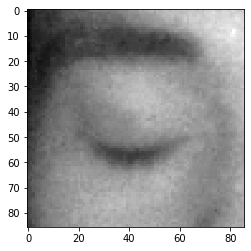

In [3]:
plt.imshow(img_array,cmap="gray")

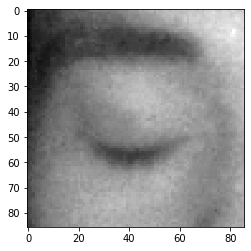

In [4]:
Datadirectory = "Train_Dataset/"
Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
        

<function matplotlib.pyplot.show(*args, **kw)>

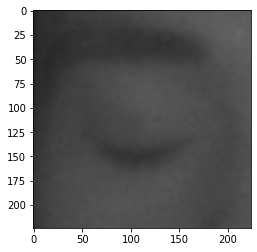

In [5]:
img_size=224
new_array = cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show

In [6]:
training_Data = []
def create_training_Data():
    for category in Classes:
            path = os.path.join(Datadirectory,category)
            class_num=Classes.index(category)
            for img in os.listdir(path):
                try:
                    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                    new_array = cv2.resize(backtorgb,(img_size,img_size))
                    training_Data.append([new_array,class_num])
                except Exception as e:
                    pass
                        
                        
                        
                   
        
                        
                        
                         
            
            

In [7]:
create_training_Data()

In [8]:
print(len(training_Data))

16919


In [9]:
import random
random.shuffle(training_Data)

In [10]:
X=[]
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,img_size,img_size,3)    

In [11]:
X.shape

(16919, 224, 224, 3)

In [12]:
X=X/255.0

In [14]:
Y=np.array(y)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 9s 1us/step


In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [19]:
base_input = model.layers[0].input

In [20]:
base_output = model.layers[-4].output

In [21]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [22]:
new_model = keras.Model(inputs=base_input,outputs=final_output)

In [23]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [24]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [25]:
new_model.fit(X,Y,epochs=1,validation_split=0.1)

476/476 [==============================] - 2580s 5s/step - loss: 0.1378 - accuracy: 0.9544 - val_loss: 0.0865 - val_accuracy: 0.9699


In [26]:
new_model.save('my_model.h5')

In [96]:
img_array = cv2.imread('t2.jpg',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

In [97]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [98]:
X_input.shape

(1, 224, 224, 3)

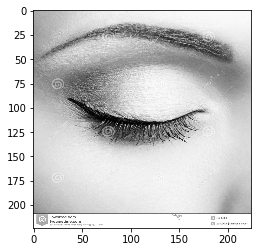

In [99]:
plt.imshow(new_array)

In [100]:
X_input=X_input/255.0

In [101]:
prediction =new_model.predict(X_input)

In [102]:
p1=prediction*10
if(p1>1):
    print('Open')
else:
    print('Closed')

Closed


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
new_model = tf.keras.models.load_model('my_model.h5')

In [5]:
import cv2
img_size=224

In [6]:
img_array = cv2.imread('s0001_00001_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

In [7]:
import numpy as np

In [8]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [9]:
X_input.shape

(1, 224, 224, 3)

In [10]:
import matplotlib.pyplot as plt

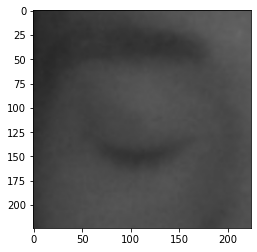

In [11]:
plt.imshow(new_array)

In [12]:
X_input=X_input/255.0

In [13]:
prediction =new_model.predict(X_input)

In [14]:
p1=prediction*10
if(p1>1):
    print('Open')
else:
    print('Closed')

Closed
